In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
advt=pd.read_csv(r'E:\sheeba working\adv.sales.csv')
advt.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
advt.shape

(200, 5)

In [10]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
advt.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
advt.isnull().sum()*100/advt.shape[0]

Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64

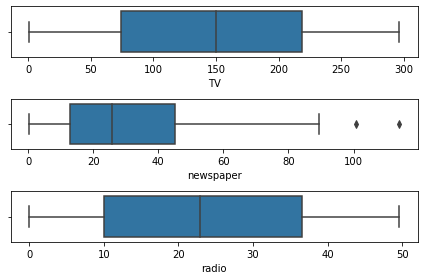

In [17]:
fig,axs=plt.subplots(3,figsize=(6,4))
plt1=sns.boxplot(advt['TV'],ax=axs[0])
plt2=sns.boxplot(advt['newspaper'],ax=axs[1])
plt3=sns.boxplot(advt['radio'],ax=axs[2])
plt.tight_layout()

# Exploratory Data analysis-Univariate Analysis-sales is the target variable

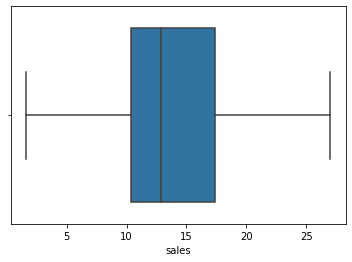

In [18]:
sns.boxplot(advt['sales'])
plt.show()

Seeing how sales are related to other variables using scatter plot

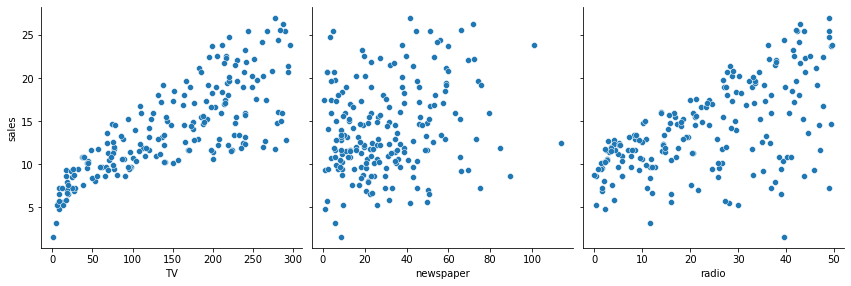

In [19]:
sns.pairplot(advt,x_vars=['TV','newspaper','radio'],y_vars='sales',height=4,aspect=1,kind='scatter')
plt.show()

Though it is appearing from the plot that TV dataset seems to be more linear as compared to other variable dispersion of values.
However let's see the correlation between different variables with heatmap

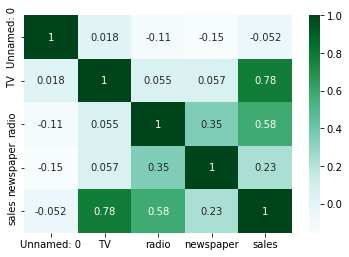

In [20]:
sns.heatmap(advt.corr(),cmap="BuGn",annot=True)
plt.show()

Building simple linear Regression model

In [21]:
x=advt['TV']
y=advt['sales']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)


In [23]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [24]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [27]:
import statsmodels.api as sm

In [28]:
x_train_sm=sm.add_constant(x_train)

In [29]:
lnr=sm.OLS(y_train,x_train_sm).fit()

In [30]:
lnr.params

const    6.989666
TV       0.046497
dtype: float64

In [31]:
print(lnr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           2.84e-30
Time:                        22:29:05   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

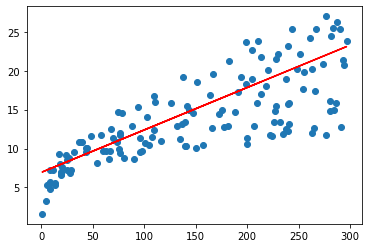

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9487 + 0.0545*x_train,'r')
plt.show()

In [34]:
y_train_pred=lnr.predict(x_train_sm)
resid=(y_train-y_train_pred)

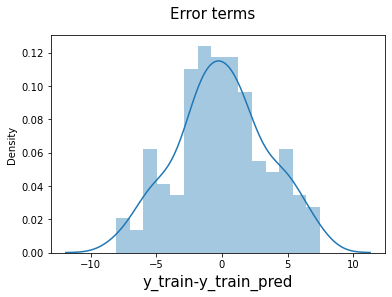

In [35]:
fig=plt.figure()
sns.distplot(resid,bins=15)
fig.suptitle('Error terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

# predictions on dataset

In [36]:
x_test_sm=sm.add_constant(x_test)
y_pred=lnr.predict(x_test_sm)

In [37]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.8241456288327016

In [40]:
#Checking the R-squared value on the test data
r_squared=r2_score(y_test,y_pred)

In [41]:
r_squared

0.59429872677833

# Visualizing the fit on the test data

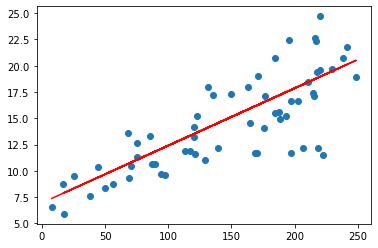

In [42]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9487+0.0545*x_test,'r')
plt.show()